# Data Science 112 - Final Project

Project Idea: Walkability Index

Datasets:
1.   Walkability Index: https://catalog.data.gov/dataset/walkability-index1
2.   Geographical area codes: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2019&layergroup=Block+Groups
3.   Crime by location

Research Question: To what extent can city walkability be understood from income and other variables

## Data Collection and Cleaning

In [2]:
'''
Dataset: Walkability Index
Link: https://catalog.data.gov/dataset/walkability-index1
'''

import pandas as pd

df = pd.read_csv("walkability.csv")
df

In [ ]:
df[df['STATEFP'] == 48]

df['GEOID'] = (df['STATEFP'] * 10000000000) + (df['COUNTYFP'] * 10000000) + (df['TRACTCE'] * 10) + df['BLKGRPCE']
df[df['STATEFP'] == 48]['GEOID']

0        481130078254
1        481130078252
2        481130078253
3        481130078241
4        481130078242
             ...     
15806    484717901012
15807    484717901021
15808    484717901013
15809    482150246001
15810    482150246002
Name: GEOID, Length: 15811, dtype: int64

In [ ]:
'''
Dataset: Block Group, 2019, Texas
Link: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2019&layergroup=Block+Groups
Instructions:
1. Open link
2. Select Texas
3. Download ZIP file
4. Extract ZIP
5. Upload all files from the folder into Colab
6. Run cell
'''

import geopandas as gpd

!unzip /content/tl_2019_48_bg.zip

shapefile = gpd.read_file("tl_2019_48_bg.shp")
shapefile

Archive:  /content/tl_2019_48_bg.zip
 extracting: tl_2019_48_bg.cpg       
  inflating: tl_2019_48_bg.dbf       
  inflating: tl_2019_48_bg.prj       
  inflating: tl_2019_48_bg.shp       
  inflating: tl_2019_48_bg.shp.ea.iso.xml  
  inflating: tl_2019_48_bg.shp.iso.xml  
  inflating: tl_2019_48_bg.shx       


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,113,007825,4,481130078254,Block Group 4,G5030,S,297835,0,+32.8896879,-096.7393173,"POLYGON ((-96.74178 32.89034, -96.74176 32.890..."
1,48,113,007825,2,481130078252,Block Group 2,G5030,S,484945,0,+32.8901313,-096.7345512,"POLYGON ((-96.74076 32.88703, -96.74044 32.887..."
2,48,113,007825,3,481130078253,Block Group 3,G5030,S,106706,0,+32.8921583,-096.7299307,"POLYGON ((-96.73204 32.88911, -96.73202 32.889..."
3,48,113,007824,1,481130078241,Block Group 1,G5030,S,481832,0,+32.8827551,-096.7378560,"POLYGON ((-96.74167 32.88418, -96.74166 32.884..."
4,48,113,007824,2,481130078242,Block Group 2,G5030,S,687686,0,+32.8743909,-096.7383039,"POLYGON ((-96.74165 32.88027, -96.74149 32.880..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15806,48,471,790101,2,484717901012,Block Group 2,G5030,S,11088847,68626,+30.8894783,-095.4856148,"POLYGON ((-95.50158 30.88096, -95.50094 30.881..."
15807,48,471,790102,1,484717901021,Block Group 1,G5030,S,57102244,1359900,+30.8346930,-095.4676622,"POLYGON ((-95.52110 30.82847, -95.52109 30.828..."
15808,48,471,790101,3,484717901013,Block Group 3,G5030,S,289654024,8513121,+30.9095866,-095.5364781,"POLYGON ((-95.68336 30.90568, -95.68293 30.905..."
15809,48,215,024600,1,482150246001,Block Group 1,G5030,S,18109743,0,+26.3714016,-097.9668206,"POLYGON ((-98.00229 26.36873, -98.00229 26.368..."


In [ ]:
# Casts 'Block Group ID' variable into int datatype so the column can be merged
shapefile['GEOID'] = shapefile['GEOID'].astype(int)
shapefile['GEOID']

0        481130078254
1        481130078252
2        481130078253
3        481130078241
4        481130078242
             ...     
15806    484717901012
15807    484717901021
15808    484717901013
15809    482150246001
15810    482150246002
Name: GEOID, Length: 15811, dtype: int64

## _

In [ ]:
# Construct 'Block Group ID' from 'Geo ID', 'Tract', and 'Block Group'
df['BKGPIDFP00'] = (df['GEOID20'] + (df['TRACTCE'] * 10) + df['BLKGRPCE'])
df['GEOID'] = df['BKGPIDFP00'].astype(int)
df['GEOID']

0         481130078254
1         481130078252
2         481130078253
3         481130078241
4         481130078242
              ...     
220735    780319610002
220736    780319610003
220737    780319610005
220738    780319607003
220739    780319602002
Name: GEOID, Length: 220740, dtype: int64

In [ ]:
df['GEOID'] = df['GEOID20'].astype(int)

df[df['STATEFP'] == 6]['GEOID'][31440]

60530111013

In [ ]:
df[df['STATEFP'] == 6]['GEOID20'].sort_values()

33674    6.001400e+10
53008    6.001400e+10
42956    6.001400e+10
34235    6.001400e+10
43200    6.001400e+10
             ...     
49186    6.115041e+10
35490    6.115041e+10
36470    6.115041e+10
49193    6.115041e+10
49195    6.115041e+10
Name: GEOID20, Length: 23212, dtype: float64

In [ ]:
df[df['STATEFP'] == 6]['GEOID'].sort_values()

33674    60018002002
53008    60018004002
42956    60018004004
34235    60018006002
43200    60018006004
            ...     
49186    61150820010
35490    61150822002
36470    61150822004
49193    61150822006
49195    61150822008
Name: GEOID, Length: 23212, dtype: int64

In [ ]:
shapefile['GEOID'].sort_values()

2234     60014001001
21568    60014002001
11516    60014002002
2795     60014003001
11760    60014003002
            ...     
17746    61150410005
4050     61150411001
5030     61150411002
17753    61150411003
17755    61150411004
Name: GEOID, Length: 23212, dtype: int64

## Merge

In [ ]:
# Merge datasets

df_st = df[df['STATEFP'] == 48]

# Inner join
# df_merge = df_tx.merge(shapefile, on = "GEOID")

# Right join
df_merge = df_st.merge(shapefile, on = "GEOID", how = "right")

In [ ]:
df_merge['NatWalkInd'].isna().value_counts()

False    15811
Name: NatWalkInd, dtype: int64

In [ ]:
df_merge.to_csv("walkability_tx.csv")

## Geography:

**START HERE IF USING MERGED CSV:**

In [ ]:
import pandas as pd
import geopandas as gpd

# df_merge = pd.read_csv("walkability_geo_full.csv")
gdf = gpd.GeoDataFrame(df_merge)
# gdf[gdf['geometry'].isna()]

In [ ]:
# Set the geometry column if needed (done on inner join)

gdf['geometry'] = gpd.GeoSeries.from_wkt(gdf['geometry'])
gdf = gdf.set_geometry('geometry')

In [ ]:
gdf['PctHiWage'] = gdf['R_HiWageWk'].divide(gdf['TotPop'])
# gdf['PctHiWage'].sort_values()
gdf['TotPop'].sort_values()
gdf['PctHiWage'].value_counts()

inf         28
0.250000    16
0.200000    12
0.100000     7
0.111111     7
            ..
0.107256     1
0.154639     1
0.125235     1
0.229222     1
0.048547     1
Name: PctHiWage, Length: 15052, dtype: int64

In [ ]:
gdf['PctHi'] = gdf['R_HiWageWk'].divide(gdf['R_LowWageWk'] + gdf['R_MedWageWk'] + gdf['R_HiWageWk'])

In [ ]:
gdf['EPctHi'] = gdf['E_HiWageWk'].divide(gdf['E_LowWageWk'] + gdf['E_MedWageWk'] + gdf['E_HiWageWk'])

In [ ]:
gdf['PctHi'].isna().value_counts()

False    15796
True        15
Name: PctHi, dtype: int64

<Axes: >

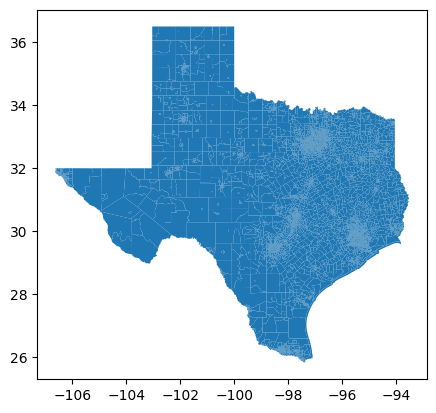

In [ ]:
gdf.plot()

## Non-geographic

In [ ]:
# 238 observations of 'TRACTCE' do not align
var = 'TRACTCE'
df_merge[df_merge[var + "_x"] != df_merge[var + "_y"]]

,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP_x,COUNTYFP_x,TRACTCE_x,BLKGRPCE_x,CSA,CSA_Name,...,TRACTCE_y,BLKGRPCE_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
856,856,1512,4.820120e+11,4.820120e+11,48,201,220500,2,288.0,"Houston-The Woodlands, TX",...,420500,2,Block Group 2,G5030,S,908112,1377,29.653476,-95.469318,"POLYGON ((-95.48196 29.651543999999998, -95.48..."
857,857,1513,4.820130e+11,4.820130e+11,48,201,252301,1,288.0,"Houston-The Woodlands, TX",...,552301,1,Block Group 1,G5030,S,1656803,12132,29.959205,-95.628342,POLYGON ((-95.63121699999999 29.96128899999999...
858,858,1519,4.820120e+11,4.820120e+11,48,201,220400,3,288.0,"Houston-The Woodlands, TX",...,420400,3,Block Group 3,G5030,S,1137544,0,29.654682,-95.455886,"POLYGON ((-95.463938 29.656897999999998, -95.4..."
859,859,1520,4.820120e+11,4.820120e+11,48,201,220500,3,288.0,"Houston-The Woodlands, TX",...,420500,3,Block Group 3,G5030,S,859565,0,29.648851,-95.472271,"POLYGON ((-95.482153 29.650994999999998, -95.4..."
860,860,1524,4.820120e+11,4.820120e+11,48,201,222100,2,288.0,"Houston-The Woodlands, TX",...,422100,2,Block Group 2,G5030,S,384771,0,29.645843,-95.484239,"POLYGON ((-95.486774 29.649573, -95.4855039999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7340,7340,14929,4.820130e+11,4.820130e+11,48,201,250800,2,288.0,"Houston-The Woodlands, TX",...,550800,2,Block Group 2,G5030,S,890843,2565,29.947505,-95.473208,"POLYGON ((-95.483768 29.94608, -95.48371999999..."
7349,7349,14941,4.820130e+11,4.820130e+11,48,201,251600,2,288.0,"Houston-The Woodlands, TX",...,551600,2,Block Group 2,G5030,S,773093,0,29.930362,-95.570442,"POLYGON ((-95.576833 29.928921, -95.576821 29...."
7350,7350,14942,4.820130e+11,4.820130e+11,48,201,250402,1,288.0,"Houston-The Woodlands, TX",...,550402,1,Block Group 1,G5030,S,1027130,0,29.968522,-95.438511,"POLYGON ((-95.447921 29.973758999999998, -95.4..."
7378,7378,15005,4.820120e+11,4.820120e+11,48,201,222402,2,288.0,"Houston-The Woodlands, TX",...,422402,2,Block Group 2,G5030,S,450589,0,29.661618,-95.498933,"POLYGON ((-95.501173 29.666746, -95.500496 29...."


In [ ]:
# Unnecessary columns
df_merge = df_merge.drop(['Unnamed: 0', 'GEOID10', 'STATEFP_y', 'COUNTYFP_y', 'BLKGRPCE_y'], axis = 1)

In [ ]:
df_merge

,OBJECTID,GEOID20,STATEFP_x,COUNTYFP_x,TRACTCE_x,BLKGRPCE_x,CSA,CSA_Name,CBSA,CBSA_Name,...,GEOID,TRACTCE_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,1,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",...,481130078254,7825,Block Group 4,G5030,S,297835,0,32.889688,-96.739317,"POLYGON ((-96.74178099999999 32.890338, -96.74..."
1,2,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",...,481130078252,7825,Block Group 2,G5030,S,484945,0,32.890131,-96.734551,"POLYGON ((-96.740765 32.887026999999996, -96.7..."
2,3,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",...,481130078253,7825,Block Group 3,G5030,S,106706,0,32.892158,-96.729931,"POLYGON ((-96.73203799999999 32.889111, -96.73..."
3,4,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",...,481130078241,7824,Block Group 1,G5030,S,481832,0,32.882755,-96.737856,"POLYGON ((-96.741669 32.884181999999996, -96.7..."
4,5,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",...,481130078242,7824,Block Group 2,G5030,S,687686,0,32.874391,-96.738304,"POLYGON ((-96.741655 32.880272999999995, -96.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7810,15803,4.804100e+11,48,41,1702,2,NaN,NaN,17780.0,"College Station-Bryan, TX",...,480410017022,1702,Block Group 2,G5030,S,1293571,0,30.610702,-96.295642,"POLYGON ((-96.303461 30.612368999999997, -96.3..."
7811,15804,4.821500e+11,48,215,24403,1,365.0,"McAllen-Edinburg, TX",32580.0,"McAllen-Edinburg-Mission, TX",...,482150244031,24403,Block Group 1,G5030,S,2594437,0,26.300520,-98.001413,"POLYGON ((-98.009602 26.307668999999997, -98.0..."
7812,15805,4.821500e+11,48,215,24500,2,365.0,"McAllen-Edinburg, TX",32580.0,"McAllen-Edinburg-Mission, TX",...,482150245002,24500,Block Group 2,G5030,S,2544756,0,26.293751,-97.969140,"POLYGON ((-97.977263 26.300943999999998, -97.9..."
7813,15810,4.821500e+11,48,215,24600,1,365.0,"McAllen-Edinburg, TX",32580.0,"McAllen-Edinburg-Mission, TX",...,482150246001,24600,Block Group 1,G5030,S,18109743,0,26.371402,-97.966821,"POLYGON ((-98.00228899999999 26.368726, -98.00..."


In [ ]:
df_merge['INTPTLON'] = df_merge['INTPTLON'].astype(float)
df_merge['INTPTLAT'] = df_merge['INTPTLAT'].astype(float)

In [ ]:
# Plot latitude and longitude

import matplotlib.pyplot as plt
import plotly.express as px

#plt.scatter(df_merge['INTPTLON'], df_merge['INTPTLAT'])
px.scatter(df_merge, x='INTPTLON', y='INTPTLAT', color='NatWalkInd', width=600)

## Links

getting gps coordinates:
https://www.reddit.com/r/gis/comments/badosg/i_have_a_csv_with_all_of_the_the_census_block/

https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2019/TGRSHP2019_TechDoc.pdf

crime data by census tract: ?

controlling for income: https://towardsdatascience.com/what-does-it-mean-to-control-for-something-in-multiple-regression-744880620988

Texas State Mapping Sysytem: EPSG:3081


## Data Exploration

In [ ]:
import plotly.express as px

In [ ]:
df_merge.corr()['NatWalkInd'].sort_values(ascending=False)[:20]

<ipython-input-163-3b4f4fe2379b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge.corr()['NatWalkInd'].sort_values(ascending=False)[:20]


NatWalkInd    1.000000
D4A_Ranked    0.862449
D3B_Ranked    0.833212
D5DRI         0.823291
D5DEI         0.823291
D5DR          0.823290
D5DE          0.823290
D4A           0.822078
D3A           0.640979
D5BE          0.593227
D3APO         0.590335
D3B           0.580944
D5BR          0.572968
D5CRI         0.527926
D3BPO4        0.514876
D5CEI         0.482447
D4D           0.473481
D4C           0.472463
D4E           0.472392
D1B           0.432503
Name: NatWalkInd, dtype: float64

In [ ]:
print(gdf.columns.tolist())

['OBJECTID', 'GEOID10', 'GEOID20', 'STATEFP_x', 'COUNTYFP_x', 'TRACTCE_x', 'BLKGRPCE_x', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp', 'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D

In [ ]:
# gdf = gdf.drop(['Unnamed: 0', 'GEOID10', 'STATEFP_y', 'COUNTYFP_y', 'BLKGRPCE_y'], axis = 1)
gdf

,OBJECTID,GEOID10,GEOID20,STATEFP_x,COUNTYFP_x,TRACTCE_x,BLKGRPCE_x,CSA,CSA_Name,CBSA,...,TRACTCE_y,BLKGRPCE_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,007825,4,Block Group 4,G5030,S,297835,0,+32.8896879,-096.7393173,"POLYGON ((-96.74178 32.89034, -96.74176 32.890..."
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,007825,2,Block Group 2,G5030,S,484945,0,+32.8901313,-096.7345512,"POLYGON ((-96.74076 32.88703, -96.74044 32.887..."
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,007825,3,Block Group 3,G5030,S,106706,0,+32.8921583,-096.7299307,"POLYGON ((-96.73204 32.88911, -96.73202 32.889..."
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,007824,1,Block Group 1,G5030,S,481832,0,+32.8827551,-096.7378560,"POLYGON ((-96.74167 32.88418, -96.74166 32.884..."
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,007824,2,Block Group 2,G5030,S,687686,0,+32.8743909,-096.7383039,"POLYGON ((-96.74165 32.88027, -96.74149 32.880..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15806,15807,4.847180e+11,4.847180e+11,48,471,790101,2,288.0,"Houston-The Woodlands, TX",26660.0,...,790101,2,Block Group 2,G5030,S,11088847,68626,+30.8894783,-095.4856148,"POLYGON ((-95.50158 30.88096, -95.50094 30.881..."
15807,15808,4.847180e+11,4.847180e+11,48,471,790102,1,288.0,"Houston-The Woodlands, TX",26660.0,...,790102,1,Block Group 1,G5030,S,57102244,1359900,+30.8346930,-095.4676622,"POLYGON ((-95.52110 30.82847, -95.52109 30.828..."
15808,15809,4.847180e+11,4.847180e+11,48,471,790101,3,288.0,"Houston-The Woodlands, TX",26660.0,...,790101,3,Block Group 3,G5030,S,289654024,8513121,+30.9095866,-095.5364781,"POLYGON ((-95.68336 30.90568, -95.68293 30.905..."
15809,15810,4.821500e+11,4.821500e+11,48,215,24600,1,365.0,"McAllen-Edinburg, TX",32580.0,...,024600,1,Block Group 1,G5030,S,18109743,0,+26.3714016,-097.9668206,"POLYGON ((-98.00229 26.36873, -98.00229 26.368..."


In [ ]:
gdf.groupby("CSA_Name")['NatWalkInd'].mean().sort_values(ascending = False)

CSA_Name
El Paso-Las Cruces, TX-NM                 11.530039
San Antonio-New Braunfels-Pearsall, TX    10.430339
Corpus Christi-Kingsville-Alice, TX       10.053763
Amarillo-Pampa-Borger, TX                 10.025232
Houston-The Woodlands, TX                  9.985997
Dallas-Fort Worth, TX-OK                   9.928593
Midland-Odessa, TX                         7.919841
Lubbock-Plainview-Levelland, TX            7.821883
Victoria-Port Lavaca, TX                   7.067416
McAllen-Edinburg, TX                       7.000887
Brownsville-Harlingen-Raymondville, TX     6.919087
Kerrville-Fredericksburg, TX               6.744898
Tyler-Jacksonville, TX                     6.698990
Name: NatWalkInd, dtype: float64

In [ ]:
gdf.loc[gdf['NatWalkInd'].sort_values(ascending = False).index]['CSA_Name']

10655                                       NaN
10123                  Dallas-Fort Worth, TX-OK
1373                  Houston-The Woodlands, TX
1569     San Antonio-New Braunfels-Pearsall, TX
2580                                        NaN
                          ...                  
3097                  Houston-The Woodlands, TX
14839                  Victoria-Port Lavaca, TX
12567       Corpus Christi-Kingsville-Alice, TX
8394                  Houston-The Woodlands, TX
14670                                       NaN
Name: CSA_Name, Length: 15811, dtype: object

In [ ]:
gdf['NatWalkInd'].sort_values(ascending = False)

10655    20.000000
10123    20.000000
1373     19.833333
1569     19.500000
2580     19.333333
           ...    
3097      1.000000
14839     1.000000
12567     1.000000
8394      1.000000
14670     1.000000
Name: NatWalkInd, Length: 15811, dtype: float64

In [ ]:
gdf.loc[10655][['CSA_Name', 'CSA', 'NatWalkInd']]

CSA_Name       NaN
CSA            NaN
NatWalkInd    20.0
Name: 10655, dtype: object

In [ ]:
# Variable of interest:
# Ranges from 1 - 20
gdf['NatWalkInd']

0        14.000000
1        10.833333
2         8.333333
3        15.666667
4        10.166667
           ...    
15806     2.500000
15807     3.833333
15808     2.000000
15809     7.500000
15810     3.166667
Name: NatWalkInd, Length: 15811, dtype: float64

## Graphs

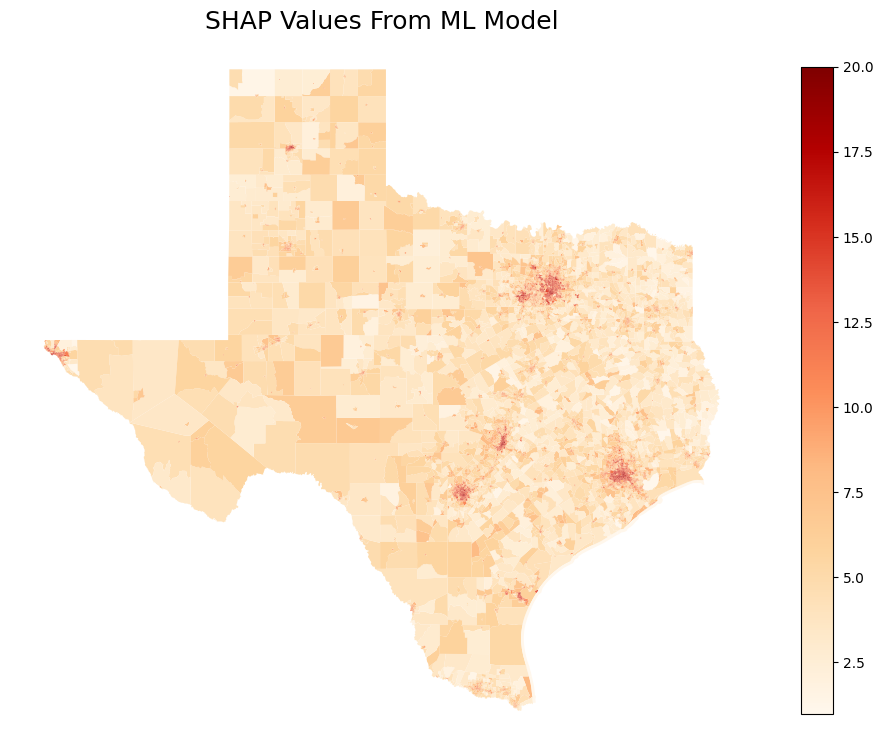

In [ ]:
ax = gdf.plot(column = "NatWalkInd", legend = True, cmap='OrRd', figsize = (12,12),
              legend_kwds={"shrink" : 0.7})
ax.set_axis_off()
ax.set_title("SHAP Values From ML Model")
ax.title.set_size(18)

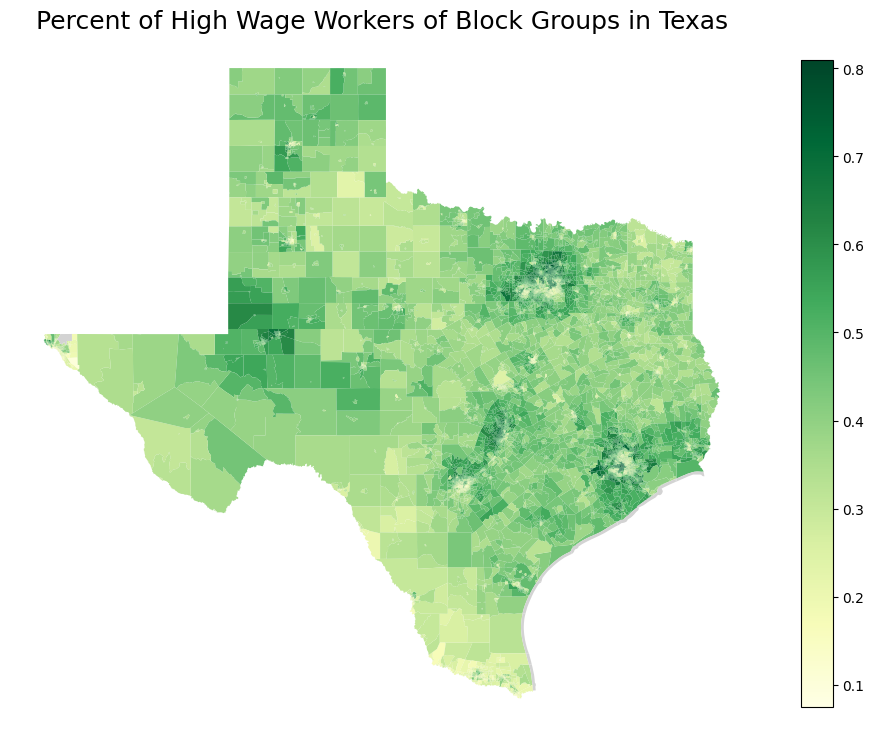

In [ ]:
ax = gdf.plot(column = "PctHi", legend = True, cmap='YlGn', figsize = (12,12),
              legend_kwds={"shrink" : 0.7}, missing_kwds={"color": "lightgrey"})
ax.set_axis_off()
ax.set_title("Percent of High Wage Workers of Block Groups in Texas")
ax.title.set_size(18)

<Axes: xlabel='EPctHi', ylabel='NatWalkInd'>

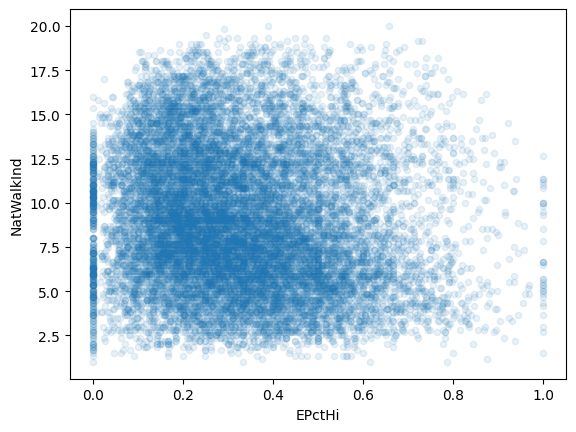

In [ ]:
gdf.plot.scatter(x = "EPctHi", y = "NatWalkInd", alpha = 0.1)